## RF PatternTraces

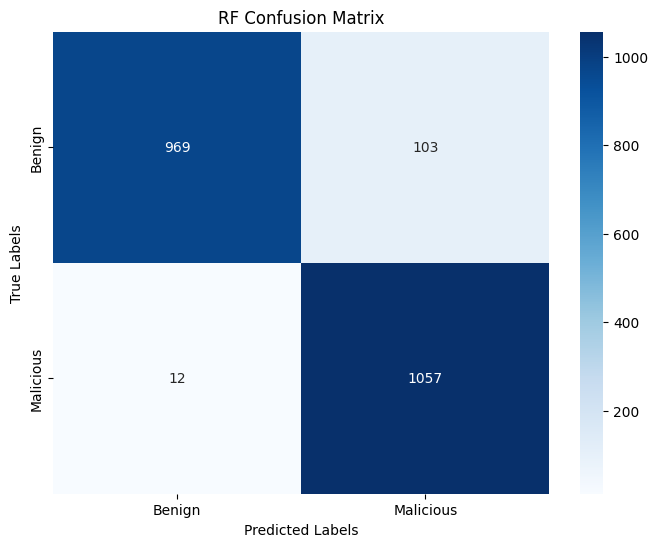

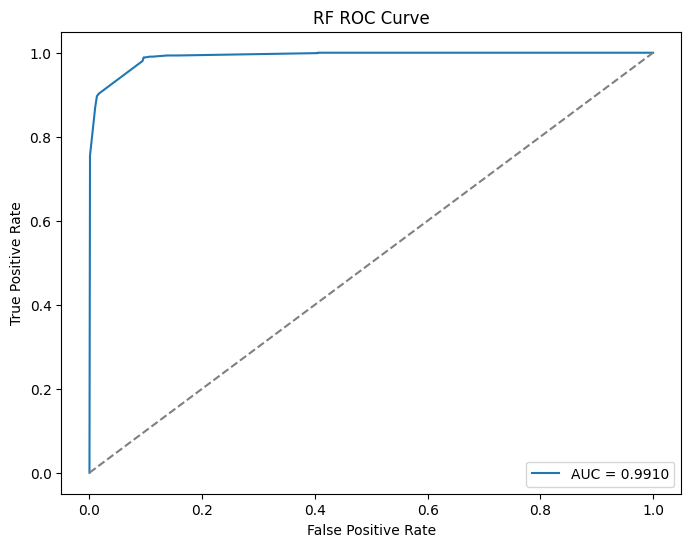

Train Accuracy: 0.94383822
Validation Accuracy: 0.94908921
Test Accuracy: 0.94628678
Precision: 0.94954088
Recall: 0.94628678
F1 Score: 0.94619279
ROC AUC: 0.99097968
Cohen's Kappa: 0.89258615
Training Time (s): 0.60145712
Validation Time (s): 0.08194804
Test Time (s): 0.07499766
Model saved at: RF_best_model_ngrams.pkl


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = [
    #'Unique_System_Calls_List',
    #'Unique_Errors_List',
    #'Unique_File_Operations_List',
    #'Unique_Memory_Operations_List',
    #'Unique_Network_Operations_List',
    #'Unique_Process_Management_Operations_List',
    'Unique_IO_Operations_List',
    'Unique_Time_Operations_List',
    'Unique_IPC_Operations_List',
    'Unique_Security_Operations_List',
    'Unique_Miscellaneous_Operations_List'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model and record training time
start_train_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
rf_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
rf_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'RF_best_model_ngrams.pkl'
joblib.dump(rf_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('RF Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('RF ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('RF ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## DT PatternTraces

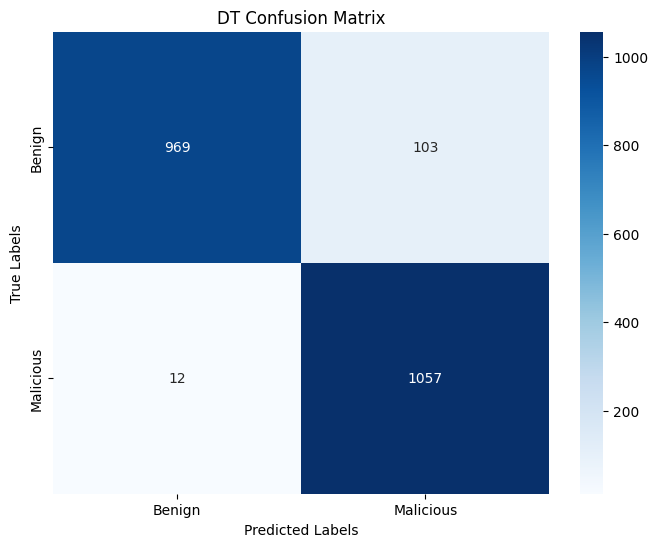

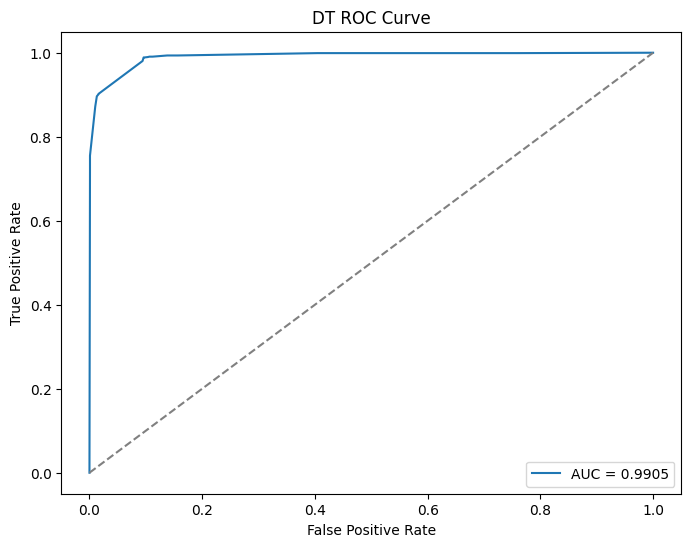

Train Accuracy: 0.94383822
Validation Accuracy: 0.94862214
Test Accuracy: 0.94628678
Precision: 0.94954088
Recall: 0.94628678
F1 Score: 0.94619279
ROC AUC: 0.99054337
Cohen's Kappa: 0.89258615
Training Time (s): 0.03099990
Validation Time (s): 0.00200033
Test Time (s): 0.00227737
Model saved at: DT_best_model_ngrams.pkl


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = [
    #'Unique_System_Calls_List',
    #'Unique_Errors_List',
    #'Unique_File_Operations_List',
    #'Unique_Memory_Operations_List',
    #'Unique_Network_Operations_List',
    #'Unique_Process_Management_Operations_List',
    'Unique_IO_Operations_List',
    'Unique_Time_Operations_List',
    'Unique_IPC_Operations_List',
    'Unique_Security_Operations_List',
    'Unique_Miscellaneous_Operations_List'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = dt_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
dt_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
dt_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'DT_best_model_ngrams.pkl'
joblib.dump(dt_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('DT Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('DT ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('DT ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## SVM PatternTraces

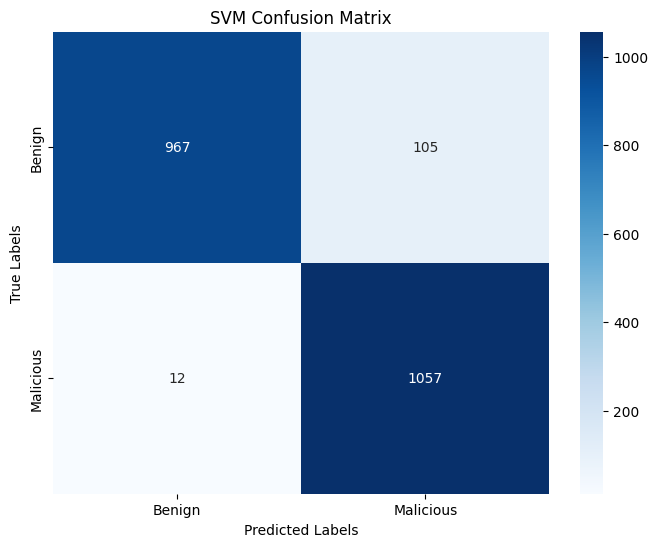

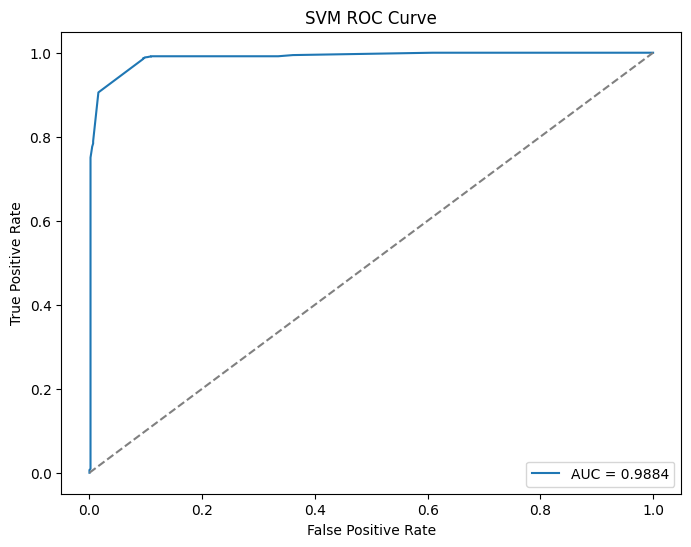

Train Accuracy: 0.94363800
Validation Accuracy: 0.94908921
Test Accuracy: 0.94535264
Precision: 0.94874529
Recall: 0.94535264
F1 Score: 0.94525268
ROC AUC: 0.98838231
Cohen's Kappa: 0.89071837
Training Time (s): 4.82237124
Validation Time (s): 0.08640337
Test Time (s): 0.11233854
Model saved at: SVM_best_model_ngrams.pkl


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

all_pattern_columns = [
    #'Unique_System_Calls_List',
    #'Unique_Errors_List',
    #'Unique_File_Operations_List',
    #'Unique_Memory_Operations_List',
    #'Unique_Network_Operations_List',
    #'Unique_Process_Management_Operations_List',
    'Unique_IO_Operations_List',
    'Unique_Time_Operations_List',
    'Unique_IPC_Operations_List',
    'Unique_Security_Operations_List',
    'Unique_Miscellaneous_Operations_List'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize SVM model with probability=True for AUC/ROC calculations
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model and record training time
start_train_time = time.time()
svm_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = svm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
svm_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
svm_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'SVM_best_model_ngrams.pkl'
joblib.dump(svm_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('SVM Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('SVM ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## LR PatternTraces

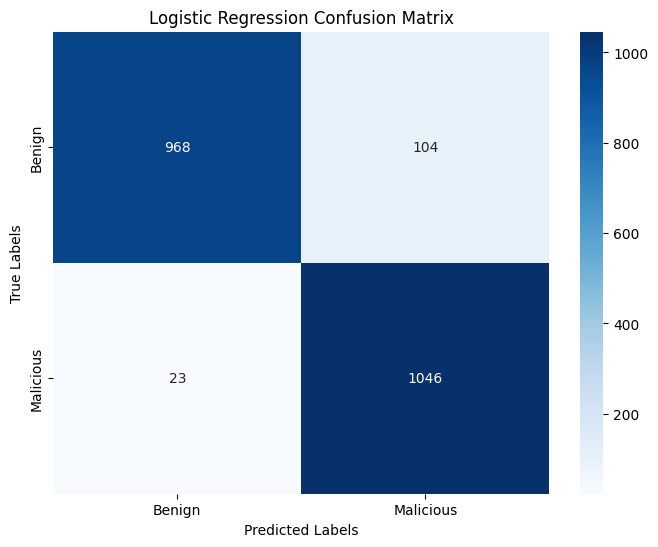

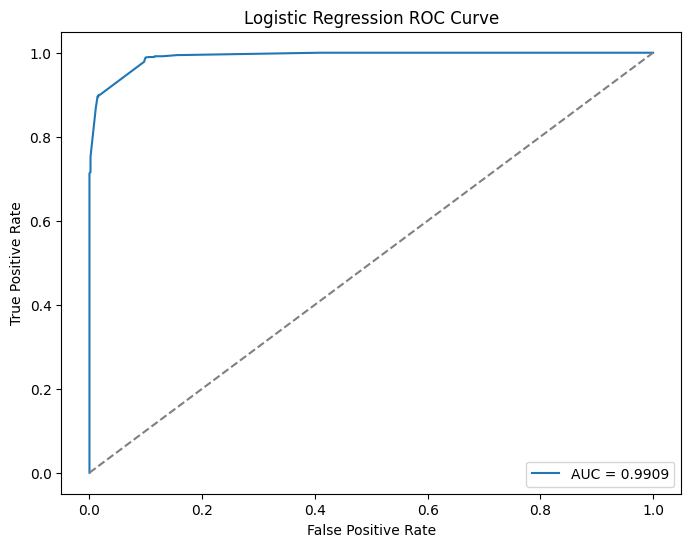

Train Accuracy: 0.94133547
Validation Accuracy: 0.94488557
Test Accuracy: 0.94068192
Precision: 0.94322527
Recall: 0.94068192
F1 Score: 0.94060006
ROC AUC: 0.99088674
Cohen's Kappa: 0.88137619
Training Time (s): 0.05878186
Validation Time (s): 0.00099826
Test Time (s): 0.00098515
Model saved at: LR_best_model_ngrams.pkl


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = [
    #'Unique_System_Calls_List',
    #'Unique_Errors_List',
    #'Unique_File_Operations_List',
    #'Unique_Memory_Operations_List',
    #'Unique_Network_Operations_List',
    #'Unique_Process_Management_Operations_List',
    'Unique_IO_Operations_List',
    'Unique_Time_Operations_List',
    'Unique_IPC_Operations_List',
    'Unique_Security_Operations_List',
    'Unique_Miscellaneous_Operations_List'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model and record training time
start_train_time = time.time()
lr_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = lr_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
lr_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
lr_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'LR_best_model_ngrams.pkl'
joblib.dump(lr_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Logistic Regression Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Logistic Regression ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## KNN Pattern Traces

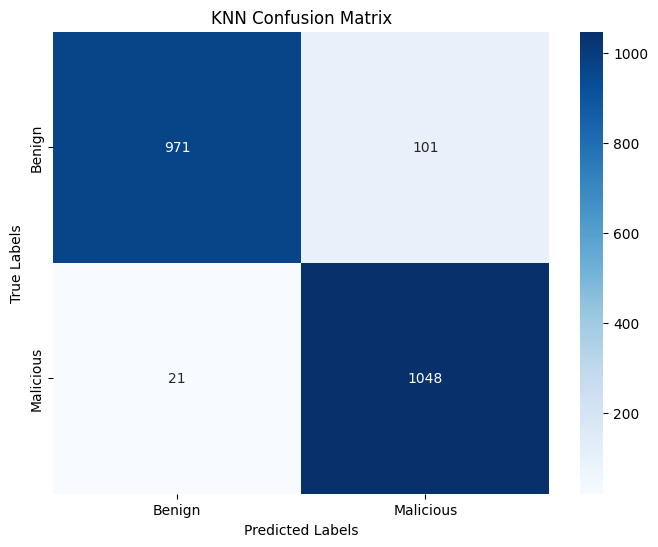

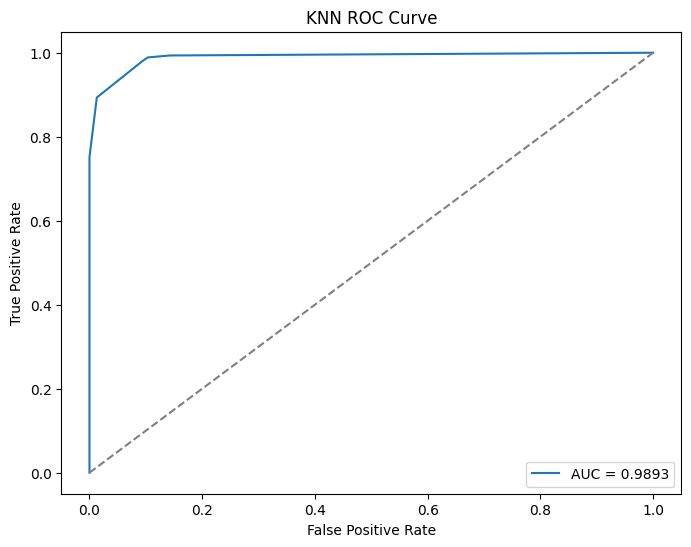

Train Accuracy: 0.94333767
Validation Accuracy: 0.94722092
Test Accuracy: 0.94301728
Precision: 0.94551081
Recall: 0.94301728
F1 Score: 0.94294061
ROC AUC: 0.98925537
Cohen's Kappa: 0.88604627
Training Time (s): 0.00300455
Validation Time (s): 1.56692076
Test Time (s): 1.65923238
Model saved at: KNN_best_model_ngrams.pkl


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = [
    #'Unique_System_Calls_List',
    #'Unique_Errors_List',
    #'Unique_File_Operations_List',
    #'Unique_Memory_Operations_List',
    #'Unique_Network_Operations_List',
    #'Unique_Process_Management_Operations_List',
    'Unique_IO_Operations_List',
    'Unique_Time_Operations_List',
    'Unique_IPC_Operations_List',
    'Unique_Security_Operations_List',
    'Unique_Miscellaneous_Operations_List'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model and record training time
start_train_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = knn_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
knn_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
knn_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'KNN_best_model_ngrams.pkl'
joblib.dump(knn_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('KNN Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('KNN ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## GB Pattern Traces

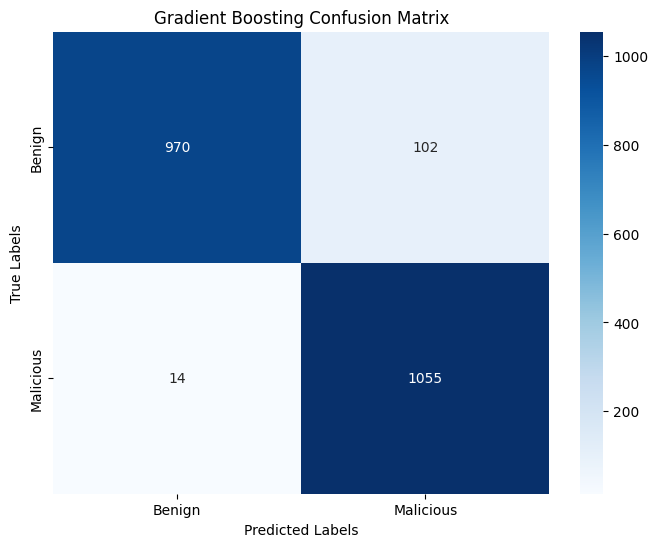

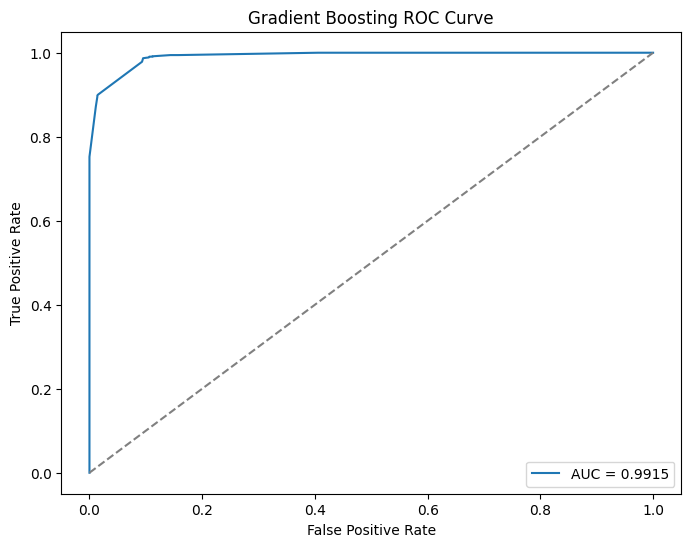

Train Accuracy: 0.94343778
Validation Accuracy: 0.94908921
Test Accuracy: 0.94581971
Precision: 0.94885846
Recall: 0.94581971
F1 Score: 0.94573116
ROC AUC: 0.99148667
Cohen's Kappa: 0.89165169
Training Time (s): 1.75030875
Validation Time (s): 0.00874257
Test Time (s): 0.00815558
Model saved at: GB_best_model_ngrams.pkl


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = [
    #'Unique_System_Calls_List',
    #'Unique_Errors_List',
    #'Unique_File_Operations_List',
    #'Unique_Memory_Operations_List',
    #'Unique_Network_Operations_List',
    #'Unique_Process_Management_Operations_List',
    'Unique_IO_Operations_List',
    'Unique_Time_Operations_List',
    'Unique_IPC_Operations_List',
    'Unique_Security_Operations_List',
    'Unique_Miscellaneous_Operations_List'
]
# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
gb_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)
y_test_pred = gb_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = gb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
gb_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
gb_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'GB_best_model_ngrams.pkl'
joblib.dump(gb_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Gradient Boosting Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Gradient Boosting ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


In [22]:
# Updated metrics for new data
updated_metrics = {
    "Model": ["Random Forest", "Decision Tree", "SVM", "Logistic Regression", "KNN", "Gradient Boosting"],
    "Train Accuracy": [0.94383822, 0.94383822, 0.94363800, 0.94133547, 0.94333767, 0.94343778],
    "Validation Accuracy": [0.94908921, 0.94862214, 0.94908921, 0.94488557, 0.94722092, 0.94908921],
    "Test Accuracy": [0.94628678, 0.94628678, 0.94535264, 0.94068192, 0.94301728, 0.94581971],
    "Precision": [0.94954088, 0.94954088, 0.94874529, 0.94322527, 0.94551081, 0.94885846],
    "Recall": [0.94628678, 0.94628678, 0.94535264, 0.94068192, 0.94301728, 0.94581971],
    "F1 Score": [0.94619279, 0.94619279, 0.94525268, 0.94060006, 0.94294061, 0.94573116],
    "ROC AUC": [0.99097968, 0.99054337, 0.98838231, 0.99088674, 0.98925537, 0.99148667],
    "Cohen's Kappa": [0.89258615, 0.89258615, 0.89071837, 0.88137619, 0.88604627, 0.89165169],
    "Training Time (s)": [0.60145712, 0.03099990, 4.82237124, 0.05878186, 0.00300455, 1.75030875],
    "Validation Time (s)": [0.08194804, 0.00200033, 0.08640337, 0.00099826, 1.56692076, 0.00874257],
    "Test Time (s)": [0.07499766, 0.00227737, 0.11233854, 0.00098515, 1.65923238, 0.00815558],
}

# Convert the dictionary to a DataFrame
updated_results_df = pd.DataFrame(updated_metrics)

# Save the DataFrame to a CSV file
updated_csv_file_path = "model_comparison_results.csv"
updated_results_df.to_csv(updated_csv_file_path, index=False)
updated_results_df

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC,Cohen's Kappa,Training Time (s),Validation Time (s),Test Time (s)
0,Random Forest,0.943838,0.949089,0.946287,0.949541,0.946287,0.946193,0.990980,0.892586,0.601457,0.081948,0.074998
1,Decision Tree,0.943838,0.948622,0.946287,0.949541,0.946287,0.946193,0.990543,0.892586,0.031000,0.002000,0.002277
2,SVM,0.943638,0.949089,0.945353,0.948745,0.945353,0.945253,0.988382,0.890718,4.822371,0.086403,0.112339
3,Logistic Regression,0.941335,0.944886,0.940682,0.943225,0.940682,0.940600,0.990887,0.881376,0.058782,0.000998,0.000985
4,KNN,0.943338,0.947221,0.943017,0.945511,0.943017,0.942941,0.989255,0.886046,0.003005,1.566921,1.659232
5,Gradient Boosting,0.943438,0.949089,0.945820,0.948858,0.945820,0.945731,0.991487,0.891652,1.750309,0.008743,0.008156


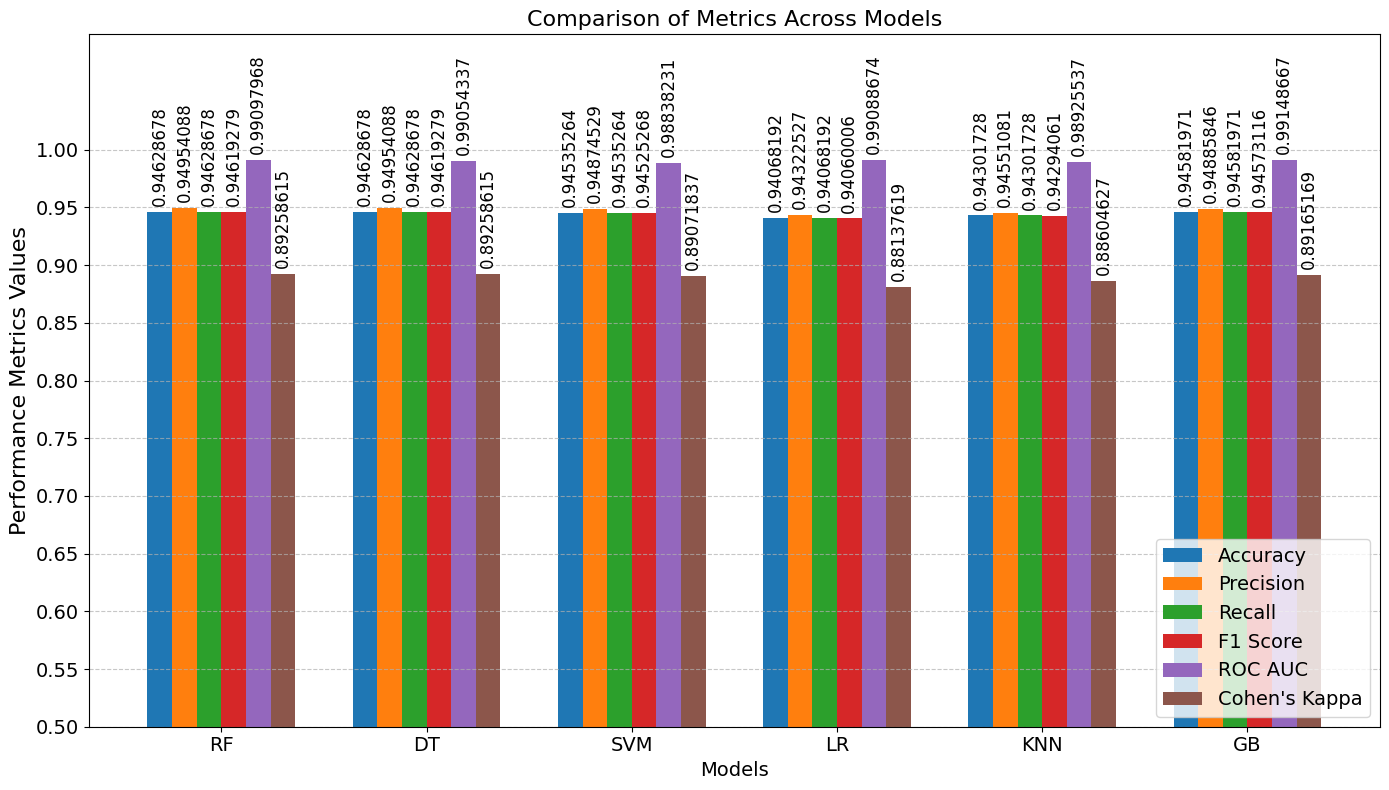

In [23]:
# Re-importing necessary libraries and re-defining the data
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = {
    "Accuracy": [0.94628678, 0.94628678, 0.94535264, 0.94068192, 0.94301728, 0.94581971],
    "Precision": [0.94954088, 0.94954088, 0.94874529, 0.94322527, 0.94551081, 0.94885846],
    "Recall": [0.94628678, 0.94628678, 0.94535264, 0.94068192, 0.94301728, 0.94581971],
    "F1 Score": [0.94619279, 0.94619279, 0.94525268, 0.94060006, 0.94294061, 0.94573116],
    "ROC AUC": [0.99097968, 0.99054337, 0.98838231, 0.99088674, 0.98925537, 0.99148667],
    "Cohen's Kappa": [0.89258615, 0.89258615, 0.89071837, 0.88137619, 0.88604627, 0.89165169],
}
models = ["RF", "DT", "SVM", "LR", "KNN", "GB"]

# Bar width and positions
bar_width = 0.12
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bars for each metric
for i, (metric, values) in enumerate(metrics.items()):
    bars = ax.bar(x + i * bar_width, values, bar_width, label=metric)
    # Adding numerical values to each bar (vertically)
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{value:.8f}", 
                ha='center', va='bottom', rotation=90, fontsize=12)

# Customizing the plot
ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=0, fontsize=14)
ax.set_title("Comparison of Metrics Across Models", fontsize=16)
ax.set_ylabel("Performance Metrics Values", fontsize=16)  # Increased Y-axis font size
ax.set_xlabel("Models", fontsize=14)
ax.legend(loc="lower right", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Setting the Y-axis to start from 0.5 with intervals of 0.05
ax.set_ylim(0.5, 1.1)
ax.set_yticks(np.arange(0.5, 1.05, 0.05))
ax.tick_params(axis='y', labelsize=14)  # Y-axis tick font size set to 14

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Comparison of Metrics Across Models.png')  # Save the plot
plt.show()

In [ ]:
metrics = {
    "Accuracy": [0.94628, 0.9462, 0.9453, 0.9458],
    "Precision": [0.9495, 0.9495, 0.9487, 0.9488],
    "Recall": [0.9462, 0.9462, 0.9453, 0.9458],
    "F1 Score": [0.9461, 0.9461, 0.9452, 0.9457],
}